In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()

# Create a DataFrame with the data and feature names
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows of the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Define features (X) and target (y)
X = iris_df.iloc[:, :-1]  # All feature columns
y = iris_df['species']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the classifier model (e.g., Logistic Regression)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [3]:
# Evaluate model accuracy on the training set
train_accuracy = model.score(X_train, y_train)
print(f"Training Set Accuracy: {train_accuracy:.2f}")

# Evaluate model accuracy on the test set
test_accuracy = model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.97
Test Set Accuracy: 0.97


In [4]:
# Generate 6 random samples for prediction (within realistic ranges of the dataset)
random_samples = np.random.uniform(low=[4.3, 2.0, 1.0, 0.1], high=[7.9, 4.4, 6.9, 2.5], size=(6, 4))

# Predict species for these random samples
predicted_species = model.predict(random_samples)
predicted_species

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica'], dtype=object)

In [5]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



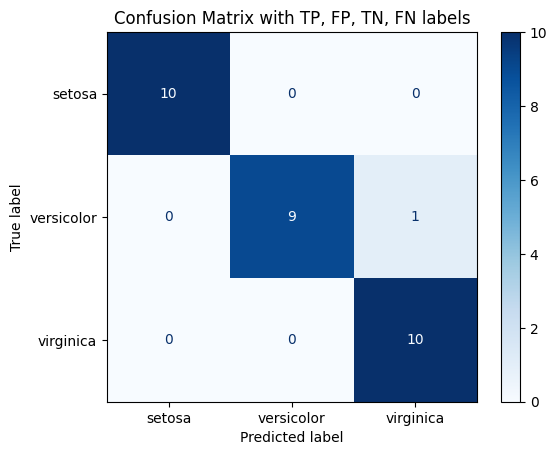

In [6]:
# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')

# Annotate the confusion matrix with TP, FP, TN, FN
plt.title("Confusion Matrix with TP, FP, TN, FN labels")
plt.show()

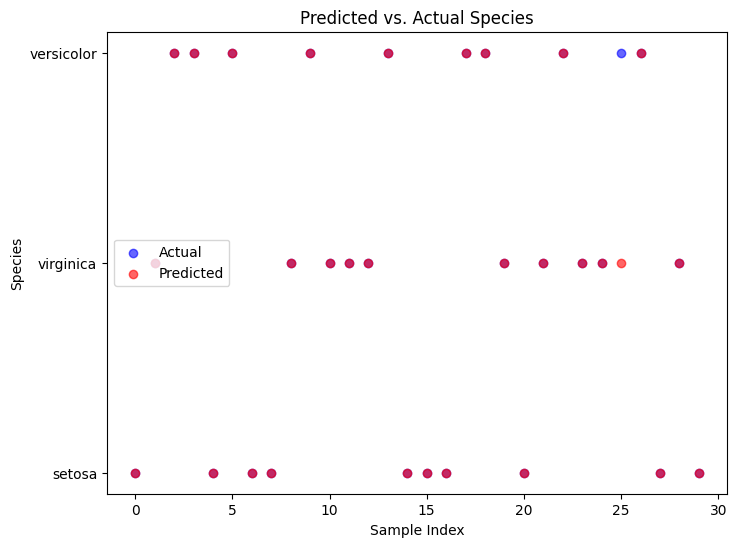

In [7]:
# Plot predicted vs. actual values for better visualization
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)
plt.title("Predicted vs. Actual Species")
plt.xlabel("Sample Index")
plt.ylabel("Species")
plt.legend()
plt.show()

In [8]:
# Define a single sample for prediction (example input)
single_sample = np.array([[5.5, 3.5, 1.3, 0.2]])  # Adjust values as needed

# Predict the species for the single sample
single_prediction = model.predict(single_sample)

# Output the predicted species
print(f"Predicted species for the sample {single_sample} is: {single_prediction[0]}")

Predicted species for the sample [[5.5 3.5 1.3 0.2]] is: setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [9]:
# Calculate the confusion matrix again for reference
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# True Positives (TP) are the diagonal elements of the confusion matrix
TP = np.diag(conf_matrix)

# False Positives (FP) are the column sums minus the diagonal elements
FP = conf_matrix.sum(axis=0) - TP

# False Negatives (FN) are the row sums minus the diagonal elements
FN = conf_matrix.sum(axis=1) - TP

# True Negatives (TN) are the total sum of elements minus the above calculated sums
TN = conf_matrix.sum() - (FP + FN + TP)

# Output the results
for i, species in enumerate(model.classes_):
    print(f"Species: {species}")
    print(f"  TP: {TP[i]} | FP: {FP[i]} | FN: {FN[i]} | TN: {TN[i]}\n")

Species: setosa
  TP: 10 | FP: 0 | FN: 0 | TN: 20

Species: versicolor
  TP: 9 | FP: 0 | FN: 1 | TN: 20

Species: virginica
  TP: 10 | FP: 1 | FN: 0 | TN: 19



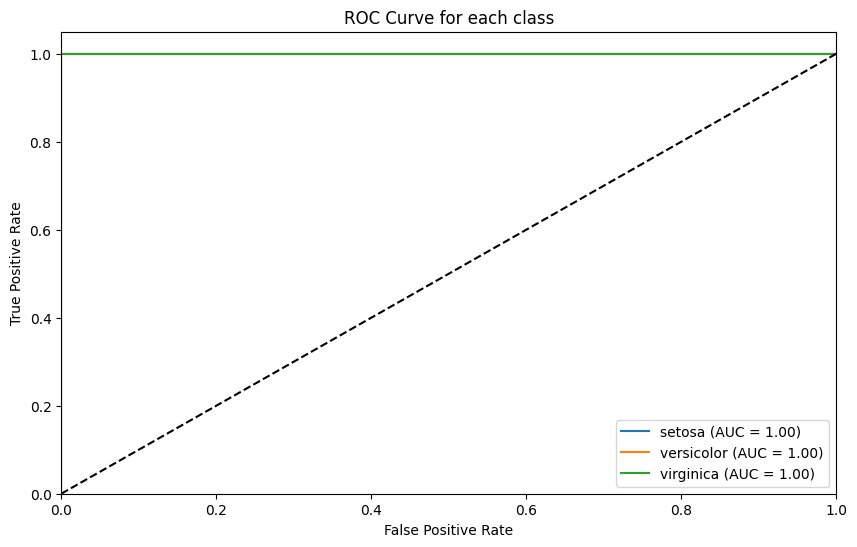

In [10]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output labels for multi-class ROC curve
y_test_binarized = label_binarize(y_test, classes=model.classes_)
y_pred_proba = model.predict_proba(X_test)

# Generate ROC curves for each class
plt.figure(figsize=(10, 6))
for i, species in enumerate(model.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{species} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='lower right')
plt.show()

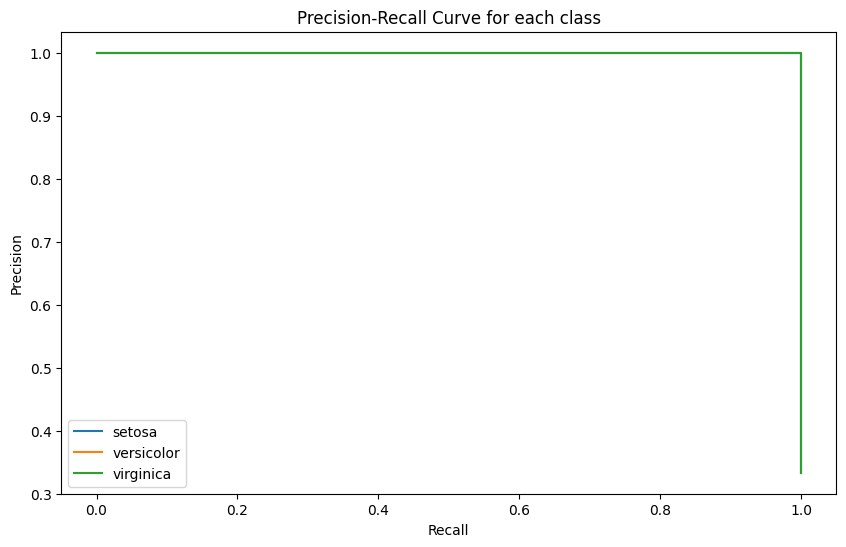

In [11]:
from sklearn.metrics import precision_recall_curve

# Generate Precision-Recall curves for each class
plt.figure(figsize=(10, 6))
for i, species in enumerate(model.classes_):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'{species}')

# Plot formatting
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc='lower left')
plt.show()

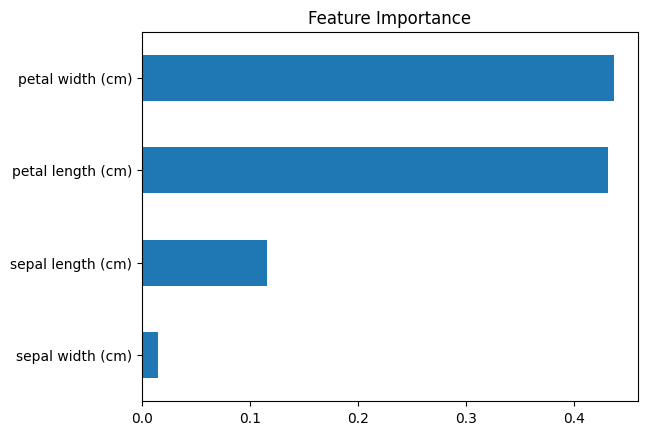

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForest model for feature importance visualization
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances and plot them
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

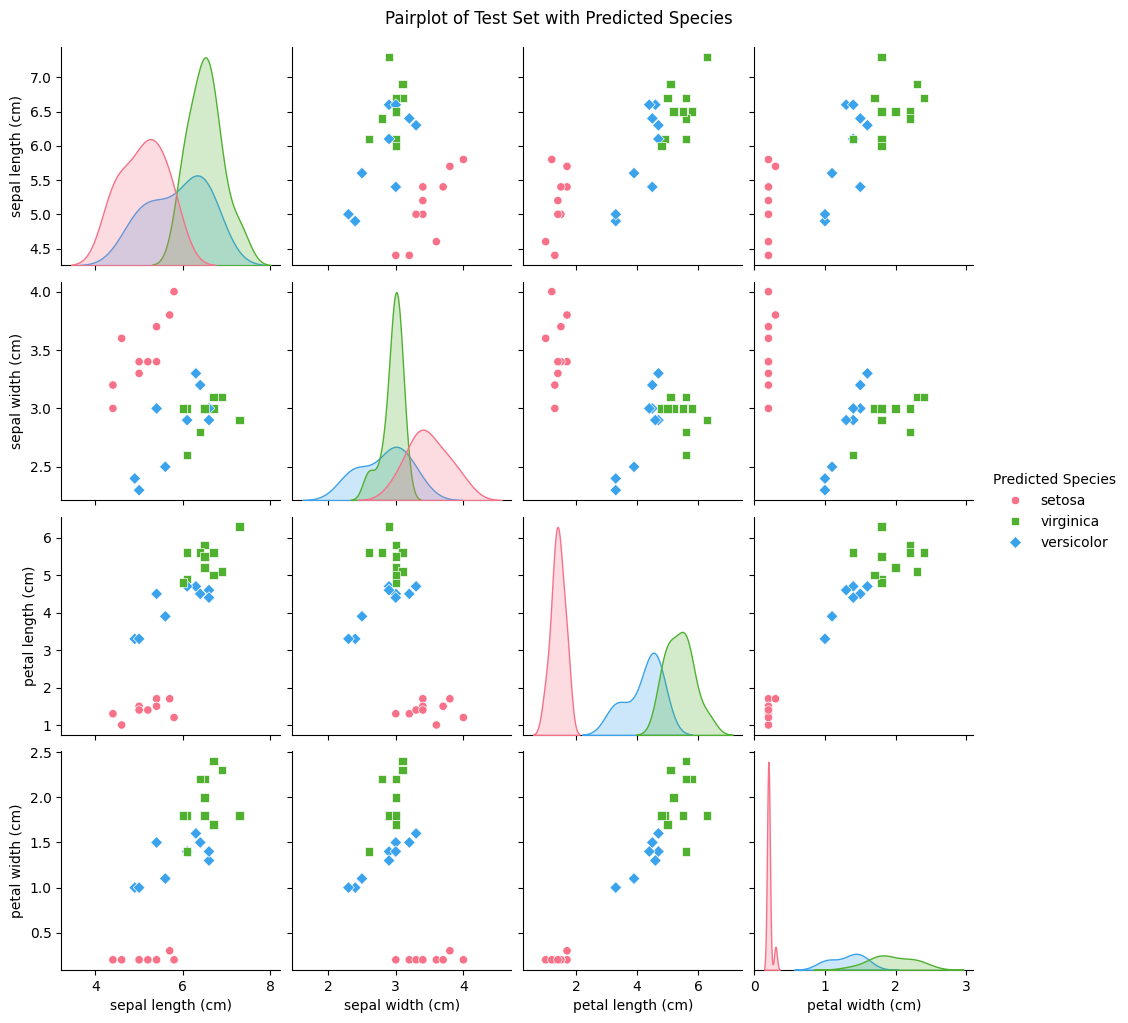

In [13]:
import seaborn as sns

# Create a pairplot of the features colored by true species and predicted species
# Add predicted labels to the test set DataFrame
X_test_copy = X_test.copy()
X_test_copy['Actual Species'] = y_test.reset_index(drop=True)
X_test_copy['Predicted Species'] = y_pred

# Plot pairplot
sns.pairplot(X_test_copy, hue='Predicted Species', diag_kind='kde', markers=["o", "s", "D"], palette='husl')
plt.suptitle('Pairplot of Test Set with Predicted Species', y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 c

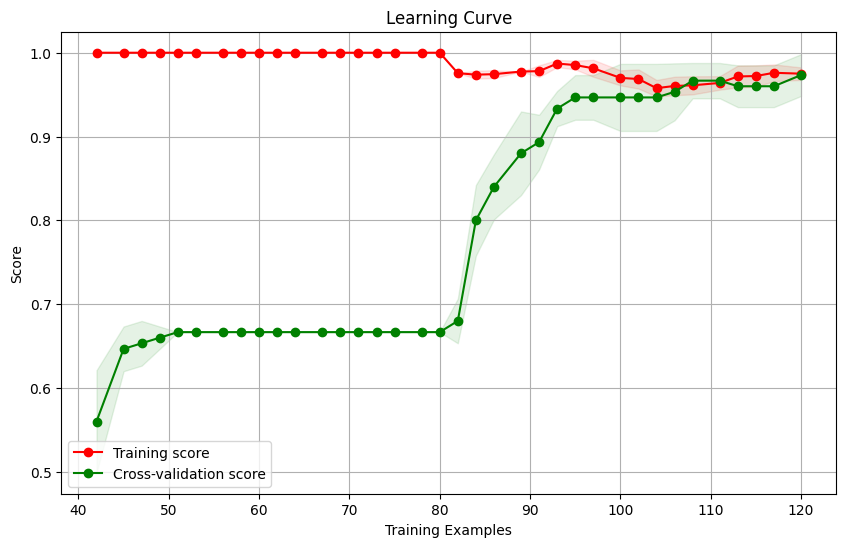

In [14]:
from sklearn.model_selection import learning_curve

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))

# Calculate mean and std of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Plot error bands
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Formatting the plot
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()